In [1]:
import IP
%pylab inline
from scipy.stats import hmean

Populating the interactive namespace from numpy and matplotlib


#Problem One

###Creating the bar image

In [18]:
'''
Create a series of 14 white bars separated by black regions.
Each bar should be 11 pixels wide and 230 pixels high.
The separation between the bars should be 19 pixels.
'''

image_bar = zeros([230,14*11+13*19])
for i in range(0,14*11+13*19):
    if (i % 30)==0:
        image_bar[:,i:i+11]=1;

In [19]:
'''
Rescale the image so that when appling harmonic mean filter,
the zero in the image won't be at the denominator of the filter
'''

image_bar = image_bar*9+1

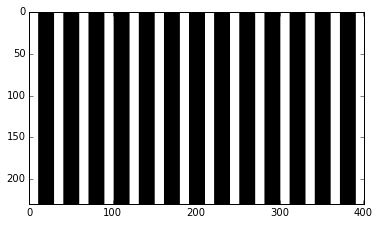

In [22]:
imshow(image_bar,cmap='gray')

In [4]:
def own_arith_mean(I,dim):
    size = I.shape;
    Ifilt = zeros([size[0],size[1]]);
    for i in range(0,size[0]-dim):
        for j in range(0,size[1]-dim):
            SubMat=I[i:i+dim,j:j+dim];
            SubMat1D = SubMat.flatten();
            mean = IP.np.average(SubMat1D);
            Ifilt[i+(dim+1)/2,j+(dim+1)/2] = mean
    return Ifilt

In [5]:
def own_Harmonic_mean(I,dim):
    size = I.shape;
    Ifilt = zeros([size[0],size[1]]);
    for i in range(0,size[0]-dim):
        for j in range(0,size[1]-dim):
            SubMat=I[i:i+dim,j:j+dim];
            SubMat1D = SubMat.flatten();
            harmean = hmean(SubMat1D)
            Ifilt[i+(dim+1)/2,j+(dim+1)/2] = harmean
    return Ifilt
    

In [6]:
def own_median_fil(Image,masksize):
    [row,col]=Image.shape
    a = (masksize-1)/2
    newImage = zeros([row,col])
    for x in arange(0,row,1):
        for y in arange(0,col,1):
            if y<a:
                newImage[x,y]=Image[x,y+1]
            elif x<a:
                newImage[x,y]=Image[x+1,y]
            elif y > col-a:
                newImage[x,y]=Image[x,y-1]
            elif x > row-a:
                newImage[x,y]=Image[x-1,y]
            else:
                neighbour = Image[x-a:x+a,y-a:y+a]
                newImage[x,y]= median(neighbour)  
    return newImage

In [7]:
def own_mid_point(Image,dim):
    size = Image.shape;
    Ifilt = zeros([size[0],size[1]]);
    for i in range(0,size[0]-dim):
        for j in range(0,size[1]-dim):
            Submat = Image[i:i+dim,j:j+dim];
            Submat1D = Submat.flatten();
            maximum = Submat1D.max();
            minimum = Submat1D.min();
            Ifilt[i+(dim+1)/2,j+(dim+1)/2]=(maximum+minimum)/2
    return Ifilt

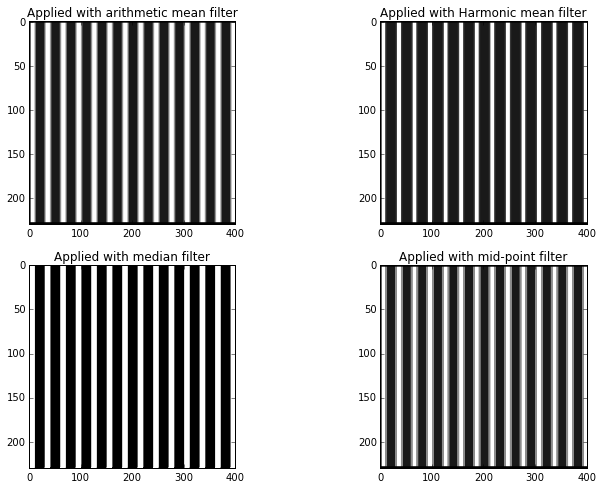

In [23]:
fig,((ax1,ax2),(ax3,ax4))=IP.plt.subplots(2,2,figsize=(10,8))

I1 = own_arith_mean(image_bar,5)
I2 = own_Harmonic_mean(image_bar,5)
I3 = own_median_fil(image_bar,5)
I4 = own_mid_point(image_bar,5)

ax1.set_title('Applied with arithmetic mean filter')
ax1.imshow(I1,cmap='gray',aspect='auto')

ax2.set_title('Applied with Harmonic mean filter')
ax2.imshow(I2,cmap='gray',aspect='auto')

ax3.set_title('Applied with median filter')
ax3.imshow(I3,cmap='gray',aspect='auto')

ax4.set_title('Applied with mid-point filter')
ax4.imshow(I4,cmap='gray',aspect='auto')

fig.subplots_adjust(hspace=0.2,wspace=0.7)

###Arithmetic Filter
The arithmetic filter smooths the whole image and whenever the edge between black and white bar occurs, it gets blur. 

###Harmoinic Mean Filter
The harmoinic mean filter make the white bar looks 'thinner',due to the fact that in the equation below:

\begin{align*}
HarmonicMean = \frac{5*5}{\sum{\frac{1}{pixel}}}
\end{align*}
When the mask contain both the white and black bar, it will erode the white bar because the black pixels make the denominator of the equation very large. If I have not scale the image, there should not be any blurring when I use harmonic mean filter, the border between black and white bar should be sharp.

### Median filter
The image acquired after median filter is the original image. Since the output of is either zero and one, so it will not cause any effect on the edge. 

### mid-point filter
Mid-point refers to one half of the smallest and largest value.Therefore as we expect, there would be a gray bar occurs at the edges.

# Problem Two

In [25]:
def own_radon(Image,theta):
    '''
    Zero pad the image first, otherwise when we rotate the the image, 
    the length of diagonal will exceed the length of the original image.
    
    '''
    size = Image.shape;
    Diag = np.sqrt((size[0])**2+(size[1])**2);
    Length_Pad = np.ceil(Diag-size[0]);
    Width_Pad = np.ceil(Diag-size[1]);
    Pad_image = zeros([size[0]+Length_Pad,size[1]+Width_Pad]);
    Pad_image[ceil(Length_Pad/2):ceil(Length_Pad/2+size[0]),ceil(Width_Pad/2):ceil(Width_Pad/2+size[1])]=Image;
    
    '''
    Now we begin to take the projection of the input image
    I use function 'imrotate' to change the projection angle
    '''
    n = len(theta);
    Projection = zeros([Pad_image.shape[1],n]);
    for i in range(0,n,1):
        a = IP.imrotate(Pad_image,theta[i],interp='bilinear');
        Projection[:,i]=transpose(a.sum(axis=0));
    return Projection

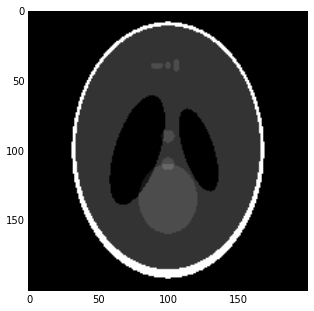

In [26]:
'''
Create the image of Shep-Logan CT phantom, and rescale its 
maximum and minimum value to zero and one
'''
I_ph = IP.rgb2gray(IP.phantom(200))
I_ph = 255*(I_ph-I_ph.min())/I_ph.max()
figure(figsize(5,5))
imshow(I_ph,cmap='gray')

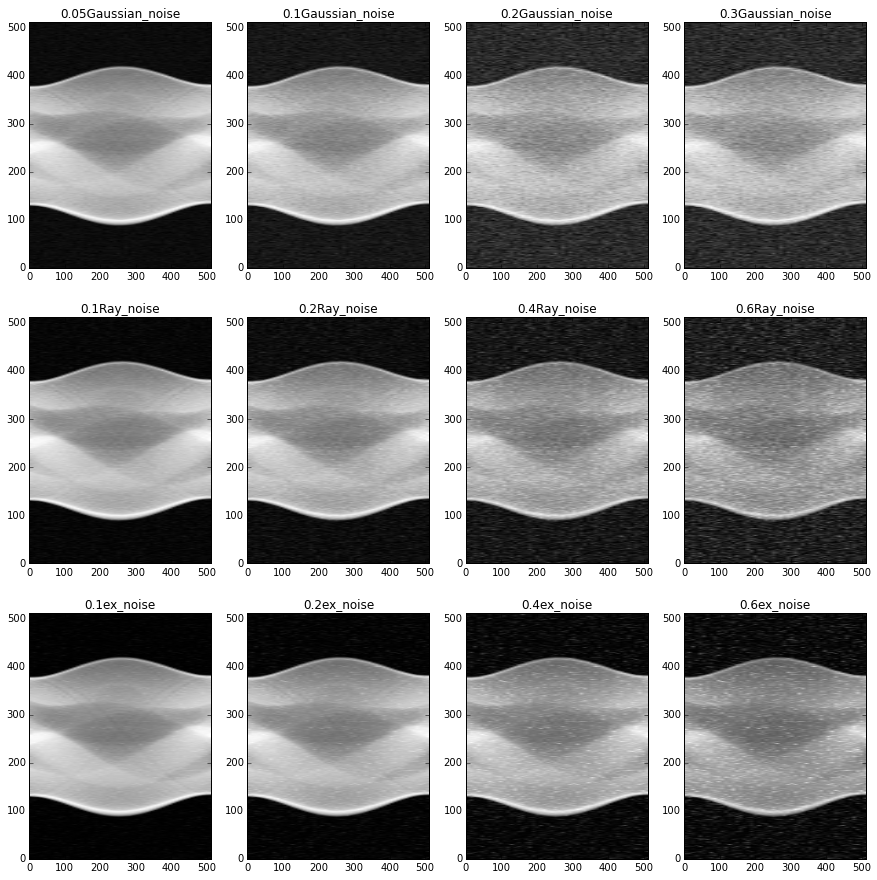

In [27]:
'''
show the effect of a Rayleigh, Exponential and Gaussian noise on the quality images
'''
theta = linspace(0,180);
iii =own_radon(I_ph,theta);
iii = 255*(iii - iii.min())/iii.max()
a=shape(iii)

Gaussian_noise = randn(*shape(iii))
Gaussian_noise = 255*(Gaussian_noise - Gaussian_noise.min())/Gaussian_noise.max()
Ray_noise = rayleigh(1,a)
Ray_noise = 255*(Ray_noise - Ray_noise.min())/Ray_noise.max()
ex_noise = exponential(1,a)
ex_noise = 255*(ex_noise - ex_noise.min())/ex_noise.max()

fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3, 4,figsize=(15,15))

Ir1=iii+ 0.05*Gaussian_noise
ax1.set_title('0.05Gaussian_noise')
ax1.imshow(Ir1, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir2=iii+ 0.1*Gaussian_noise
ax2.set_title('0.1Gaussian_noise')
ax2.imshow(Ir2, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir3=iii+ 0.2*Gaussian_noise
ax3.set_title('0.2Gaussian_noise')
ax3.imshow(Ir3, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir4=iii+ 0.3*Gaussian_noise
ax4.set_title('0.3Gaussian_noise')
ax4.imshow(Ir3, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir5=iii+ 0.1*Ray_noise
ax5.set_title('0.1Ray_noise')
ax5.imshow(Ir5, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir6=iii+ 0.2*Ray_noise
ax6.set_title('0.2Ray_noise')
ax6.imshow(Ir6, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir7=iii+ 0.4*Ray_noise
ax7.set_title('0.4Ray_noise')
ax7.imshow(Ir7, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir8=iii+ 0.6*Ray_noise
ax8.set_title('0.6Ray_noise')
ax8.imshow(Ir8, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir9=iii+ 0.1*ex_noise
ax9.set_title('0.1ex_noise')
ax9.imshow(Ir9, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir10=iii+ 0.2*ex_noise
ax10.set_title('0.2ex_noise')
ax10.imshow(Ir10, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir11=iii+ 0.4*ex_noise
ax11.set_title('0.4ex_noise')
ax11.imshow(Ir11, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

Ir12=iii+ 0.6*ex_noise
ax12.set_title('0.6ex_noise')
ax12.imshow(Ir12, cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')


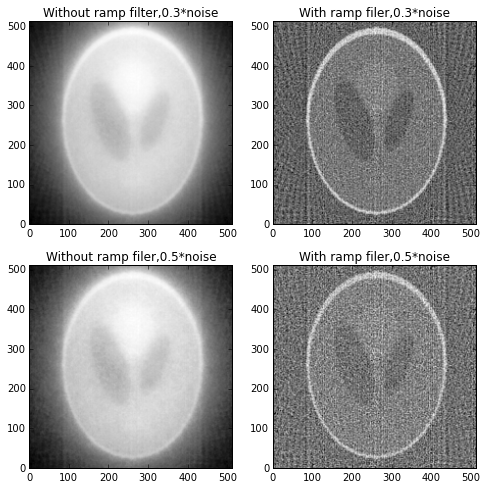

In [28]:
'''
Compare the image we got through inverse radon transform with and without ramp filter.
I choose the image with Rayleigh noise to demonstrate the effect of ramp filter.
'''

fig,((ax1,ax2),(ax3,ax4))=subplots(2,2,figsize=(8,8))

Ir13 = iii + 0.3*Ray_noise;
Ir14 = iii + 0.5*Ray_noise;

ax1.set_title('Without ramp filter,0.3*noise')
ax1.imshow(IP.iradon(Ir13,theta,filter=None), cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

ax2.set_title('With ramp filer,0.3*noise')
ax2.imshow(IP.iradon(Ir13,theta,filter='ramp'), cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

ax3.set_title('Without ramp filer,0.5*noise')
ax3.imshow(IP.iradon(Ir14,theta,filter=None), cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')

ax4.set_title('With ramp filer,0.5*noise')
ax4.imshow(IP.iradon(Ir14,theta,filter='ramp'), cmap=plt.cm.Greys_r,
           extent=(0,512, 0, 512), aspect='auto')



#Problem Three

In [31]:
import scipy.io as scio
Data = scio.loadmat('Q3_image.mat')  
Contaminted_I = Data['I']

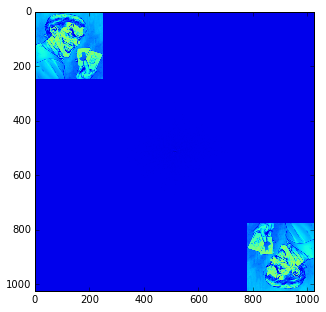

In [32]:
f_Contaminted_I = IP.fft2(Contaminted_I)
imshow(fftshift(f_Contaminted_I.real))

We can see that the high frequency part of the iamge has been contamined, therefore I apply a low-pass filter to the iamge

In [33]:
def ideal_low(a,image):
    U,V = IP.dtfuv(512,512)
    D = np.sqrt(U**2+V**2)
    Low_pass_filter_a = D<=a
    I_ideal_low_a = IP.fftfilt(image,Low_pass_filter_a)
    
    return I_ideal_low_a


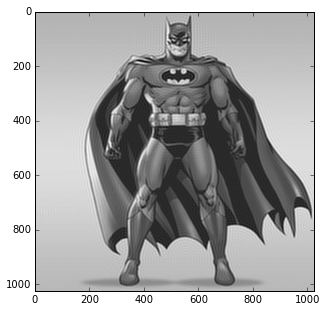

In [34]:
K = ideal_low(100,Contaminted_I)
imshow(K,cmap='gray')

# Problem Four

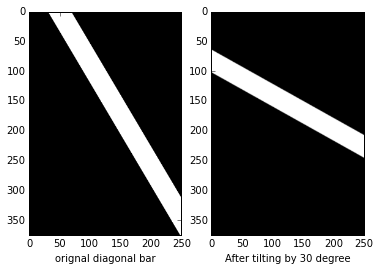

In [118]:
'''
Generate the an image of a diagonal bar
Set the angle to be 30 degree
'''
height = 500
width = 500
angle = 30
diag = np.sqrt(height**2+width**2);
I = zeros([diag,diag]);
I[:,width/2-width/30:width/2+width/30]=1;
I_tilt = IP.imrotate(I,30)
I_f = I_tilt[height/2:height/4+height,width/4:width/4+width/2]
I_ff = IP.imrotate(I_f,angle)
subplot(121);imshow(I_f,aspect='auto',cmap='gray');xlabel('orignal diagonal bar')
subplot(122);imshow(I_ff,aspect='auto',cmap='gray');xlabel('After tilting by 30 degree')

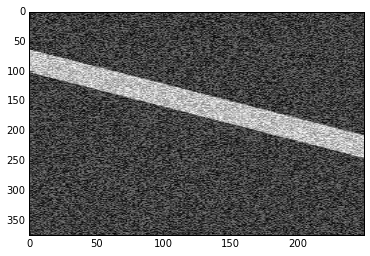

In [119]:
'''
Generate Gaussian Noise and add it to the image
'''

G_noise = I_ff.max()*IP.rand(I_ff.shape[0],I_ff.shape[1])
I_add_noise = I_ff + G_noise
imshow(I_add_noise,cmap='gray',aspect='auto')

In [126]:
from skimage.morphology import square

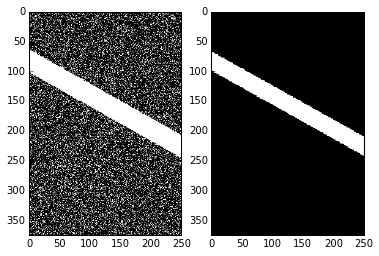

In [155]:
'''
Assume that we forget the angle of the image, Let's compute it.
Here is my step to get a clearer version of the image
1.Threshold the image to distinguish the bar against the background
2.Apply image erosion to the image to lessen the noise. 
'''
I_threshold = I_add_noise>200
I_erode = IP.imerode(I_threshold,square(5))
subplot(121);imshow(I_threshold,cmap='gray',aspect='auto')
subplot(122);imshow(I_erode,cmap='gray',aspect='auto')

In [159]:
'''
a represent all the position of non-zero point in the image
By looking at a, we know that the row position of the non-zero point 
varies from 69 to 241.And the column position of the nonzero point varies from 2 to 247
'''
a= np.nonzero(I_erode)
a

(array([ 69,  69,  69, ..., 240, 241, 241]),
 array([  2,   3,   4, ..., 247, 246, 247]))

In [179]:
'''
In this cell I'm going to compute the average length of the
bar's width. 
'''
summation= 0;
for i in range(2,247):
    b= np.nonzero(I_erode[:,i]);
    c = (shape(b))[1]
    summation = summation + c;
AverageWidth = summation/(247-1)

### Therefore the angle can be computed this way:

\begin{align*}
Angle = \arctan{\frac{241-69-AverageWidth}{247-2}} = 29.7
\end{align*}

As we have tilted the bar by 30 degree,this result is approximately correct. 